### Question 7 : 
Write a Julia Snippet which includes a user defined function, call it "initial_data.jl" to define a function on a domain $$x\in[-10,10]$$ and generates a plot of the same.
 

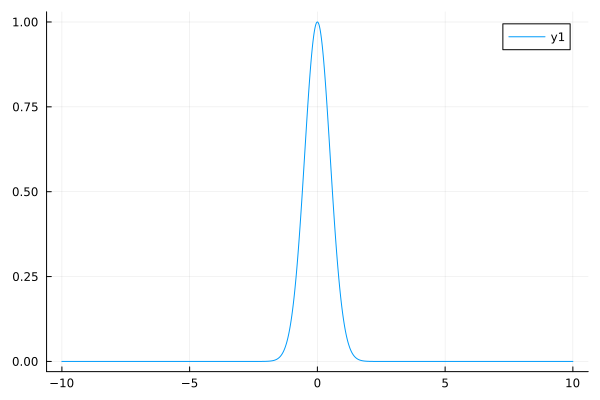

In [39]:
using Plots

function myFunction(x)
   sig=0.5
   mu=0
   return exp(-((x - mu)^2.0) / (2 * ((sig)^ 2.0)))  #Gaussiam
   # return cos.(x)              
end

x = range(-10,10,step = 0.001)                       #Iterating over x, storing corresponding values of y and plotting.
y = Vector{Float64}()

for i in eachindex(x)
    push!(y,myFunction(x[i]))
end
plot(x,y)

### Question 8 : 
Write a Julia Snippet which takes the function defined in the "initial_data.jl" and integrates it on the domain $$x\in[-10,10]$$.

In [40]:
# include("initial_data.jl")

function integrate(startx, endx, stepSize)
    sum = 0
    invert = 1          #negating the answer if integrating from higher x to lower x
    if(endx<startx)
        temp = endx
        endx = startx
        startx = temp
        invert = -1
    end

    #Simpson's integration rule
    maxRange = (endx-startx)/stepSize
    for i in 0:maxRange
        xn = startx+(i*stepSize)
        if (i==0 || i==maxRange)
            sum = sum+myFunction(xn)
        elseif(mod(i,2)==1)
            sum = sum+(4*myFunction(xn))
        elseif(mod(i,2)==0)
            sum = sum+(2*myFunction(xn))
        end
    end
    return (invert*sum*stepSize/3)
end

print(integrate(-10,10,0.001))

# The code below was used to plot the integral of myFunction

# x = range(-10,10,step = 0.001)
# y = Vector{Float64}()
# # print(integrate(-10,10,0.1))
# for i in eachindex(x)
#     push!(y,integrate(0,x[i],0.001))
# end
# plot!(x,y)

1.253314137315493

### Question 9 :
Write a Julia Snippet to generate a table giving co-efficients of the second derivative expansion in terms of the discretized function elements.

In [41]:
using Printf
h = 1         #This does not affect the final values
Rrange = 10    # the range of r till which coefficients are desired

for r in 1:Rrange
    local coeffMatrix = zeros(Float64, r, r)
    for row in 1:r
        for col in 1:r
            coeffMatrix[row, col] = 2*((row*h)^(col*2))/factorial(2*col)  #Updating the coefficient matrix for linear system
        end
    end
    local inverse = inv(coeffMatrix)                                      #Inverting the matrix

    @printf "%.4f" (h^2)*(-2*sum(inverse[1, :]))                          #Print the coeff for k=0 by appropriate comparison
    for i in 1:r
        print(" ")                                  
        @printf "%.4f" inverse[1, i]                                      #Print all other coeff by appropriate comparison
    end
    print("\n")
end

-2.0000 1.0000
-2.5000 1.3333 -0.0833
-2.7222 1.5000 -0.1500 0.0111
-2.8472 1.6000 -0.2000 0.0254 -0.0018
-2.9272 1.6667 -0.2381 0.0397 -0.0050 0.0003
-2.9828 1.7143 -0.2679 0.0529 -0.0089 0.0010 -0.0001
-3.0236 1.7500 -0.2917 0.0648 -0.0133 0.0021 -0.0002 0.0000
-3.0548 1.7778 -0.3111 0.0754 -0.0177 0.0035 -0.0005 0.0001 -0.0000
-3.0795 1.8000 -0.3273 0.0848 -0.0220 0.0050 -0.0009 0.0001 -0.0000 0.0000
-3.0695 1.7909 -0.3205 0.0807 -0.0199 0.0042 -0.0007 0.0001 -0.0000 -0.0000 0.0000
